In [2]:
import pandas as pd
pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_rows", 50)

import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime
from datetime import datetime as dt
import glob
import os

In [3]:
# importing json files

dfs=[]
for file in glob.glob("data/*.json"):
    dataframe = pd.read_json(file)['posts']
    # flatten the structure
    dataframe = pd.json_normalize(dataframe)
    # insert file names
    dataframe['file_name'] = os.path.basename(file)
    dfs.append(dataframe)

# concatenate all data and drop repeated entries
df=pd.concat(dfs).drop_duplicates(subset='uuid', keep='last')

In [4]:
# slicing out only relevant columns 

selected_columns = [
    'file_name',
    'uuid', 
    'title',
    'content',
    'post_flair_text',
    'author',
    'author_flair_text',
    'created',
    'comments',
    'score_up',
    'preview',
    'link',
    'domain',
    'is_image',
    'is_video',
    'video_link'
    ]	
df = df[selected_columns]

# Replace empty cell with Nan
dataframe = dataframe.replace(r'^\s*$', np.nan, regex=True)

# Format datetime
df['created'] = pd.to_datetime(df.created, unit='ms').dt.tz_localize('US/Eastern')
# crate a column storing "date" 
df['created_date'] = df['created'].dt.date
df['created_date'] = pd.to_datetime(df['created_date'])


# Fix empty or ill-formed domain column
selfpost_mask = df.domain.str.match('^$')
df.loc[selfpost_mask, 'domain'] = 'self_post'

df.created_date.value_counts().sort_index()

/var/folders/f2/xbsrplkj23z71l_fw6890_hr0000gn/T/ipykernel_75165/4060232883.py:24: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataframe = dataframe.replace(r'^\s*$', np.nan, regex=True)


created_date
2024-07-21     31
2024-07-22    500
2024-07-23    615
2024-07-24    585
2024-07-25    631
2024-07-26    596
2024-07-27    611
2024-07-28    619
2024-07-29    647
2024-07-30    585
2024-07-31    628
2024-08-01    591
2024-08-02    615
2024-08-03    638
2024-08-04    631
2024-08-05    651
2024-08-06    596
2024-08-07    601
2024-08-08    609
2024-08-09    599
2024-08-10    584
2024-08-11    630
2024-08-12    611
2024-08-13    656
2024-08-14    632
2024-08-15    605
2024-08-16    609
2024-08-17    611
2024-08-18    587
2024-08-19    637
2024-08-20    608
2024-08-21    619
2024-08-22    616
2024-08-23    618
2024-08-24    588
2024-08-25    595
2024-08-26    607
2024-08-27    614
2024-08-28    601
2024-08-29    594
2024-08-30    619
2024-08-31    589
2024-09-01    588
2024-09-02    605
2024-09-03    614
2024-09-04    625
2024-09-05    604
2024-09-06    612
2024-09-07    407
Name: count, dtype: int64

In [5]:
# Due to the lack of data, removing all posts from 2024-07-21

df = df[df['created_date'] != '2024-07-21']

df.value_counts('created_date').sort_index()

created_date
2024-07-22    500
2024-07-23    615
2024-07-24    585
2024-07-25    631
2024-07-26    596
2024-07-27    611
2024-07-28    619
2024-07-29    647
2024-07-30    585
2024-07-31    628
2024-08-01    591
2024-08-02    615
2024-08-03    638
2024-08-04    631
2024-08-05    651
2024-08-06    596
2024-08-07    601
2024-08-08    609
2024-08-09    599
2024-08-10    584
2024-08-11    630
2024-08-12    611
2024-08-13    656
2024-08-14    632
2024-08-15    605
2024-08-16    609
2024-08-17    611
2024-08-18    587
2024-08-19    637
2024-08-20    608
2024-08-21    619
2024-08-22    616
2024-08-23    618
2024-08-24    588
2024-08-25    595
2024-08-26    607
2024-08-27    614
2024-08-28    601
2024-08-29    594
2024-08-30    619
2024-08-31    589
2024-09-01    588
2024-09-02    605
2024-09-03    614
2024-09-04    625
2024-09-05    604
2024-09-06    612
2024-09-07    407
Name: count, dtype: int64

In [6]:
# Keep only the top 500 posts by "score_up" from each date so that the playing field is more leveled
df = df.groupby('created_date').apply(lambda x: x.nlargest(500, 'score_up')).reset_index(drop=True)

df.value_counts("created_date").sort_index()

/var/folders/f2/xbsrplkj23z71l_fw6890_hr0000gn/T/ipykernel_75165/3108082903.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('created_date').apply(lambda x: x.nlargest(500, 'score_up')).reset_index(drop=True)


created_date
2024-07-22    500
2024-07-23    500
2024-07-24    500
2024-07-25    500
2024-07-26    500
2024-07-27    500
2024-07-28    500
2024-07-29    500
2024-07-30    500
2024-07-31    500
2024-08-01    500
2024-08-02    500
2024-08-03    500
2024-08-04    500
2024-08-05    500
2024-08-06    500
2024-08-07    500
2024-08-08    500
2024-08-09    500
2024-08-10    500
2024-08-11    500
2024-08-12    500
2024-08-13    500
2024-08-14    500
2024-08-15    500
2024-08-16    500
2024-08-17    500
2024-08-18    500
2024-08-19    500
2024-08-20    500
2024-08-21    500
2024-08-22    500
2024-08-23    500
2024-08-24    500
2024-08-25    500
2024-08-26    500
2024-08-27    500
2024-08-28    500
2024-08-29    500
2024-08-30    500
2024-08-31    500
2024-09-01    500
2024-09-02    500
2024-09-03    500
2024-09-04    500
2024-09-05    500
2024-09-06    500
2024-09-07    407
Name: count, dtype: int64

In [7]:
# Extract twitter handles 
df[df.domain =='twitter.com'].link.str.split('/').str[3].str.lower()
df.loc[df.domain == 'twitter.com', 'twitter_handle'] = df[df.domain == 'twitter.com'].link.str.split('/').str[3].str.lower()
df['twitter_handle'].fillna(np.nan, inplace=True)

# Top twitter handles mentioned
df.value_counts('twitter_handle', ascending=False).head(10)

/var/folders/f2/xbsrplkj23z71l_fw6890_hr0000gn/T/ipykernel_75165/3006735851.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['twitter_handle'].fillna(np.nan, inplace=True)


twitter_handle
elonmusk        333
behizytweets    309
endwokeness     217
libsoftiktok    181
bennyjohnson    129
catturd2        121
dc_draino       120
immeme0         114
nicksortor      113
trumpwarroom    112
Name: count, dtype: int64

In [8]:
!python -m spacy download en_core_web_trf

/Users/keenansmacbookairm3/.pyenv/versions/3.12.0/lib/python3.12/site-packages/transformers/utils/generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 457.4/457.4 MB 24.2 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 24.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_trf')


In [9]:
import spacy
import spacy_transformers
import nltk
nltk.download('wordnet')
from nltk import bigrams, trigrams
nlp = spacy.load("en_core_web_lg")
stopwords = list(nlp.Defaults.stop_words) 
stopwords.extend(["ago", 'old'])

import contractions
import emoji
import re



def clean_it_all_up (text, extra_stops):
    text = emoji.replace_emoji(text)
    text = contractions.fix(text)
    text = re.sub(r'\W+', ' ', text)
    doc = nlp(text)
    lemmatized_tokens = []
    
    for token in doc:
        if (
            token.text.lower() not in stopwords 
            and (extra_stops is None or token.text.lower() not in extra_stops) 
            # and token.pos_ in {'NOUN', 'PROPN', 'VERB', 'ADJ'} 
            # and token.ent_type_ not in {'GPE', 'LOC'}
            and token.pos_ not in {"AUX",
                                   "ADP",
                                   "CONJ", 
                                   "CCONJ", 
                                   "DET", 
                                   "INTJ", 
                                   "PART", 
                                   "PUNCT",
                                   "SCONJ", 
                                   "SYM", 
                                   "X", 
                                   "SPACE"}
        ):
          
            
            lemmatized_tokens.append(token.lemma_.lower())
            
    return " ".join(lemmatized_tokens)   


/Users/keenansmacbookairm3/.pyenv/versions/3.12.0/lib/python3.12/site-packages/transformers/utils/generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
/Users/keenansmacbookairm3/.pyenv/versions/3.12.0/lib/python3.12/site-packages/transformers/utils/generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/keenansmacbookairm3/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [10]:
text = "Donald Trump loves pancakes. So do I."
extra_stops=['trump']

clean_it_all_up(text, extra_stops)

'donald love pancake'

In [11]:
def date_selection(start_date, end_date):
    start_date = datetime.datetime.strptime(start_date, "%Y-%m-%d")
    end_date = end_date = datetime.datetime.strptime(end_date, "%Y-%m-%d")

    date_list = []
    current_date = start_date
    date_list.append(current_date.strftime('%Y-%m-%d'))

    while current_date < end_date:
        next_date = current_date + datetime.timedelta(days=1)
        next_date = next_date
        if next_date >= end_date:
            next_date = end_date
        date_list.append(next_date.strftime('%Y-%m-%d'))
        current_date = next_date

    return date_list


In [12]:
def ngram_generator(dataframe, num, start_date, end_date, extra_stops, top_n=None):
    
    date_list = date_selection(start_date, end_date)

    cleaned_tokens = ' '.join(dataframe[dataframe.created_date.isin(date_list)]['title'].apply(lambda x: clean_it_all_up(x, extra_stops)).tolist())

    if num == 1:
        ngram = pd.Series(cleaned_tokens.split()).value_counts()
    elif num == 2:
        ngram = pd.Series(list(bigrams(cleaned_tokens.split()))).value_counts()
    elif num == 3:
        ngram = pd.Series(list(trigrams(cleaned_tokens.split()))).value_counts()
    else:
        raise ValueError('Invalid number. Must choose between 1, 2, or 3.')
    
    ngram = ngram[ngram > 1].head(top_n)
    return ngram


In [13]:
# Function of returning top ngrams from the past 24 hours

def ngram_generator_24hrs(dataframe, num, extra_stops, top_n=None):
    end_date = datetime.datetime.now()
    start_date = end_date - datetime.timedelta(days=1)
    
    start_date = start_date.strftime("%Y-%m-%d")
    end_date = end_date.strftime("%Y-%m-%d")
    
    return ngram_generator(dataframe, num, start_date, end_date, extra_stops, top_n)

In [14]:
# A date-based n-gram generator
# useful for making time-series charts 

def new_ngram_generator(dataframe, num, start_date, end_date, extra_stops, top_n=None):
    # Filter dates
    date_list = date_selection(start_date, end_date)
    
    # Filter and process data
    filtered_df = dataframe[dataframe.created_date.isin(date_list)]
    filtered_df['cleaned_title'] = filtered_df['title'].apply(lambda x: clean_it_all_up(x, extra_stops))

    
    ngrams_with_dates = []
    
    for index, row in filtered_df.iterrows():
        tokens = row['cleaned_title'].split()
        if num ==1:
            unigrams_list = list(tokens)
            for unigram in unigrams_list:
                ngrams_with_dates.append((unigram, row['created_date']))
        elif num == 2:
            bigrams_list = list(bigrams(tokens))
            for bigram in bigrams_list:
                ngrams_with_dates.append((bigram, row['created_date']))
        elif num == 3:
            trigrams_list = list(trigrams(tokens))
            for trigram in trigrams_list:
                ngrams_with_dates.append((trigram, row['created_date']))
        else:
            raise ValueError('Invalid number. Must choose between 2 or 3.')
    
    ngram_df = pd.DataFrame(ngrams_with_dates, columns=['ngram', 'date']).head(top_n)
    return ngram_df


In [15]:
kamala_harris = ['kamala', "harris"]

kamala_harris_df = df[df.title.str.contains('|'.join(kamala_harris),case=False, na=False)]

kamala_harris_df.shape[0]/df.shape[0]

0.1438072531057849

In [16]:
help(new_ngram_generator)

Help on function new_ngram_generator in module __main__:

new_ngram_generator(dataframe, num, start_date, end_date, extra_stops, top_n=None)



In [17]:
new_ngram_generator(dataframe=kamala_harris_df, 
                    num=2, 
                    start_date='2024-08-15', 
                    end_date='2024-09-06', 
                    extra_stops=None, 
                    top_n=15)

/var/folders/f2/xbsrplkj23z71l_fw6890_hr0000gn/T/ipykernel_75165/1221168534.py:9: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  filtered_df = dataframe[dataframe.created_date.isin(date_list)]
/var/folders/f2/xbsrplkj23z71l_fw6890_hr0000gn/T/ipykernel_75165/1221168534.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['cleaned_title'] = filtered_df['title'].apply(lambda x: clean_it_all_up(x, extra_stops))


,ngram,date
0,"(trump, claim)",2024-08-15
1,"(claim, evidence)",2024-08-15
2,"(evidence, kamala)",2024-08-15
3,"(kamala, harris)",2024-08-15
4,"(harris, tie)",2024-08-15
5,"(tie, joe)",2024-08-15
6,"(joe, biden)",2024-08-15
7,"(reporter, ally)",2024-08-15
8,"(ally, need)",2024-08-15
9,"(need, stop)",2024-08-15


In [18]:
# create interactive charts with Plotly

import plotly.graph_objs as go

def ngram_time_series_interactive(dataframe, num, start_date, end_date, save_viz, extra_stops, top_n=None):
    ngrams_df = new_ngram_generator(dataframe, num, start_date, end_date, extra_stops)

    ngrams_df['date'] = pd.to_datetime(ngrams_df['date'])

    ngrams_counts = ngrams_df.groupby([ngrams_df['date'].dt.to_period('d'), 'ngram']).size().reset_index(name='count')

    top_ngrams = ngrams_counts.groupby('ngram')['count'].sum().nlargest(top_n).index

    top_ngrams_counts = ngrams_counts[ngrams_counts['ngram'].isin(top_ngrams)]

    top_ngram_pivot = top_ngrams_counts.pivot(index='date', columns='ngram', values='count').fillna(0)

    top_ngram_pivot.index = top_ngram_pivot.index.to_timestamp()

    fig = go.Figure()

    for ngram in top_ngram_pivot.columns:
        fig.add_trace(go.Scatter(
            x=top_ngram_pivot.index, 
            y=top_ngram_pivot[ngram], 
            mode='lines', 
            name=str(ngram)))

    fig.update_layout(
        width=1400,
        height=800,
        title=f'Top bigrams on the landing page of The Ronald between {start_date} and {end_date}',
        xaxis_title='Date',
        yaxis_title='Frequency',
        
        xaxis=dict(tickangle=45),
        legend_title_text='Top Bigrams'
    )

    if save_viz is not None:
        fig.savefig(f"viz/{save_viz}.jpeg",
                    dpi=600
                    )
        fig.show()
    else:
        fig.show()

In [19]:
# This function would only cover the past n days

def ngram_time_last_n_days_interactive(dataframe, num, last_ndays, extra_stops, set_title, save_filename, top_n=None):
    end_date = pd.to_datetime(dataframe['created_date'].max())
    start_date = end_date - pd.Timedelta(days=last_ndays)
    start_date = start_date.strftime("%Y-%m-%d")
    end_date = end_date.strftime("%Y-%m-%d")

    ngrams_df = new_ngram_generator(dataframe, num, start_date, end_date, extra_stops)

    # Prepare the data for plotting
    ngrams_df['date'] = pd.to_datetime(ngrams_df['date'])
    ngrams_counts = ngrams_df.groupby([ngrams_df['date'].dt.to_period('d'), 'ngram']).size().reset_index(name='count')
    
    top_ngrams = ngrams_counts.groupby('ngram')['count'].sum().nlargest(top_n).index
    top_ngrams_counts = ngrams_counts[ngrams_counts['ngram'].isin(top_ngrams)]

    top_ngram_pivot = top_ngrams_counts.pivot(index='date', columns='ngram', values='count').fillna(0)
    top_ngram_pivot.index = top_ngram_pivot.index.to_timestamp()

    y_max = top_ngram_pivot.values.max()
    y_range = [0, y_max * 1.1]

    fig = go.Figure()

    # Add traces for each n-gram
    for ngram in top_ngram_pivot.columns:
        fig.add_trace(go.Scatter(
            x=top_ngram_pivot.index, 
            y=top_ngram_pivot[ngram], 
            mode='lines', 
            name=str(ngram)
        ))

    fig.update_traces(line={'width': 5})

    layout = dict(
        width=1000,
        height=800,
        xaxis=dict(
            title='Date',
            tickangle=45
        ),
        yaxis=dict(
            title='Frequency',
            range=y_range
        ),
        legend_title=dict(
            text='<b>Popular Bigrams<br>',
            font=dict(
                family="Courier",
                color='firebrick',
                size=15
            )
        )
    )
    

    if set_title:
        layout['title'] = dict(
            text= f"The chart was last updated on {datetime.datetime.now():%Y-%m-%d %H:%M}",
            font=dict(
                family="Arial",
                size=20
            ),
            pad=dict(t=20)
        )

    fig.update_layout(layout)

    if save_filename:
        fig.write_html(f"viz/{save_filename}.html")
    
    fig.show()

In [20]:
ngram_time_last_n_days_interactive(dataframe=kamala_harris_df, 
                    num=2, 
                    last_ndays=14,
                    extra_stops=kamala_harris, 
                    top_n=15,
                    set_title=False,
                    save_filename=False)

/var/folders/f2/xbsrplkj23z71l_fw6890_hr0000gn/T/ipykernel_75165/1221168534.py:9: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  filtered_df = dataframe[dataframe.created_date.isin(date_list)]
/var/folders/f2/xbsrplkj23z71l_fw6890_hr0000gn/T/ipykernel_75165/1221168534.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['cleaned_title'] = filtered_df['title'].apply(lambda x: clean_it_all_up(x, extra_stops))


In [23]:
# A function that returns the top posts in interactive format
    
def top_posts_lastNdays(dataframe, num, Ndays, save_table=False):
    end_date = datetime.datetime.now()
    start_date = end_date - datetime.timedelta(days=Ndays)
    top_posts = dataframe[dataframe.created_date >= start_date].nlargest(num,'score_up')
    top_posts['post_link'] = "https://patriots.win/p/" + top_posts['uuid']
    top_posts['title'] = top_posts.apply(lambda row: f'<a href="{row["post_link"]}">{row["title"]}</a>', axis=1)
    top_posts = top_posts[['title', 
                           'score_up', 
                           'comments', 
                           'author'
                           ]]
    
    
    top_posts = top_posts.reset_index().drop(columns='index')
    top_posts.index = np.arange(1, len(top_posts)+1)

    if save_table:
        html_content = top_posts.to_html(render_links=True, 
                                         justify='center', 
                                         escape=False,
                                         classes='table table-striped table-hover', 
                                         table_id='my_table')
        
        with open(f'viz/most_popular_posts_in_the_last_day(s).html', "w") as html_file:
            html_file.write(f"""
                <html>
                <head>
                <link rel="stylesheet" type="text/css" href="https://cdn.datatables.net/1.10.21/css/jquery.dataTables.css">
                <script type="text/javascript" charset="utf8" src="https://code.jquery.com/jquery-3.5.1.js"></script>
                <script type="text/javascript" charset="utf8" src="https://cdn.datatables.net/1.10.21/js/jquery.dataTables.js"></script>
                <script>
                $(document).ready( function () {{
                    $('#my_table').DataTable();
                }} );
                </script>
                </head>
                <body>
                {html_content}
                </body>
                </html>
            """)
                                         
    return top_posts

In [24]:
top_posts_lastNdays(dataframe=election_df, num=20, Ndays=2, save_table=False)

,title,score_up,comments,author
1,"<a href=""https://patriots.win/p/1994kIBkb0"">🚨 BREAKING: Donald Trump sentencing postponed until after the election</a>",1909,280,hocuspocusfocusjeep
2,"<a href=""https://patriots.win/p/1994kH5HY8"">Scott Presler is HIRING full time field staff positions for voter registration and door knocking in the crucial state of Pennsylvania!</a>",1736,127,TheAttackTitan
3,"<a href=""https://patriots.win/p/1994kH3uNA"">He hasn't realized it yet but you do. He's going to be voting Trump. Get your ass in here Chunky Yogurt, we got a world to save! LET'S GO!!!</a>",1722,218,flp999
4,"<a href=""https://patriots.win/p/1994kICa0a"">BREAKING: The Attorney General of Georgia has blocked an effort by Election Fraudsters to overthrow three duly appointed members of the Election Board, who have been implementing significant election integrity reforms.</a>",1544,45,no_comment
5,"<a href=""https://patriots.win/p/1994kIDwvA"">Democrats Are Terrified Of GOP Plan To Protect U.S. Election From Noncitizen Voting</a>",1334,50,Sea_Still
6,"<a href=""https://patriots.win/p/1994kFvVaQ"">RNC Battles Election Fraud in Another State, Files Suit on NC Absentee Ballot Policy That Breaks Law</a>",1218,31,TateDemarcus
7,"<a href=""https://patriots.win/p/1994kH3M4k"">Because not requiring ID, combined with mail in voting, makes it completely impossible to prove fraud (obviously)</a>",774,11,MemeForTheWin
8,"<a href=""https://patriots.win/p/1994kJLWMP"">Register voters, chase ballots, and get out the vote for Trump like your life depends on it.</a>",616,25,trees65
9,"<a href=""https://patriots.win/p/1994kH5YbH"">NEW: Fundraising email CONFRIMS Robert Kennedy Jr. is now urging his supporters in every state to vote for President Trump.</a>",407,3,Looniz74
10,"<a href=""https://patriots.win/p/1994kH3dG2"">CNN Points Out Trump Has Huge Advantage Over Harris With Male Voters.</a>",390,13,rdvs34283


In [ ]:
election = ['election', 'votes', 'voter', 'ballot']
election_df = df.title.str.contains("}".join(election), case=False, na=False)

election_fraud = 

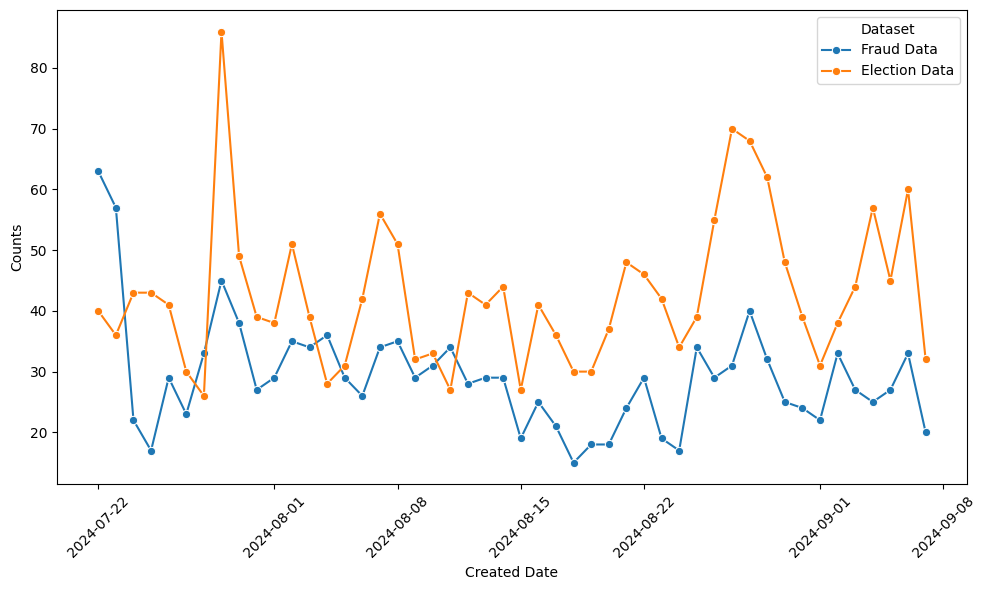

In [51]:
fraud_counts = fraud_df.created_date.value_counts().sort_index()
election_counts = election_df.created_date.value_counts().sort_index()

# Combine both dataframes into one for seaborn plotting
combined_df = pd.DataFrame({
    'Created Date': fraud_counts.index.union(election_counts.index),  # Union of all dates
    'Fraud Data': fraud_counts.reindex(fraud_counts.index.union(election_counts.index), fill_value=0),
    'Election Data': election_counts.reindex(fraud_counts.index.union(election_counts.index), fill_value=0)
})

# Melt the dataframe for seaborn
combined_df = combined_df.melt(id_vars='Created Date', value_vars=['Fraud Data', 'Election Data'], 
                               var_name='Dataset', value_name='Counts')

# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=combined_df, x='Created Date', y='Counts', hue='Dataset', marker='o')

# Add titles and labels
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
plt.tight_layout()

# Show the plot
plt.show()

<Axes: xlabel='created_date'>

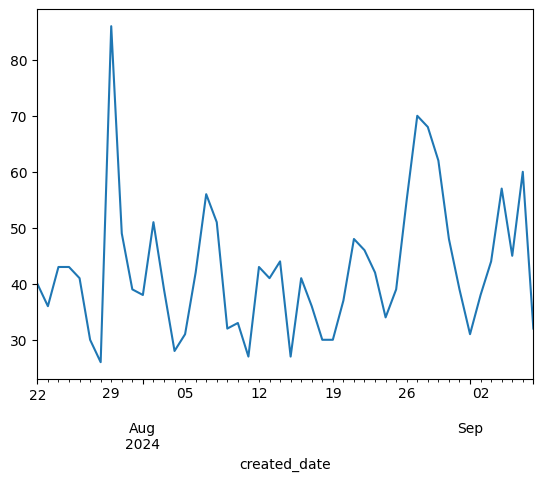

In [41]:
election_df.created_date.value_counts().sort_index().plot(kind='line')

In [110]:


ngram_time_last_n_days_interactive(dataframe=election_df, 
                    num=2, 
                    last_ndays=14,
                    extra_stops=None, 
                    top_n=15,
                    set_title=False,
                    save_filename=False)

/var/folders/f2/xbsrplkj23z71l_fw6890_hr0000gn/T/ipykernel_74286/1221168534.py:9: FutureWarning:

The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.

/var/folders/f2/xbsrplkj23z71l_fw6890_hr0000gn/T/ipykernel_74286/1221168534.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [51]:
def find_persons(text):
    # Create Doc object
    doc2 = nlp(text)

    # Identify the persons
    persons = [ent.text for ent in doc2.ents if ent.label_ == 'PERSON']

    # Return persons
    return persons

In [54]:
text= 'Donald Trump is married to Larry Ellison and Kamala Harris.'

find_persons(text)

['Donald Trump', 'Larry Ellison', 'Kamala Harris']

In [57]:
df.title.head(10)

2                                                                                                                 🚽 Only 17% of Americans View Radical-Left Tim Walz Positively 💩
3                                                                                                                                Gwen Walz is just as crazy left as her husband 🤪
4                                                                              Felony charges against teen who rode scooter, left skid marks on Spokane Pride crosswalk dismissed
5                                                                                                      Donald Trump:  17 million primary votes    Kamala Harris:  0 primary votes
6                                                                                                                                                                 Break the Cycle
9                                                                                                             

In [60]:
df.title.head(10).apply(find_persons).value_counts(dropna=True)

title
[]                               4
[Tim Walz]                       2
[Gwen Walz]                      1
[Donald Trump, Kamala Harris]    1
[Tim Walz, Ying Yang]            1
[Tim Walz, Walz]                 1
Name: count, dtype: int64

In [94]:
names = pd.DataFrame(find_persons(' '.join(df.groupby('created_date').title)))

TypeError: sequence item 0: expected str instance, tuple found

In [102]:
 pd.DataFrame(find_persons(' '.join(df[df.created_date=='2024-09-06'].title))).value_counts()

0            
Trump            59
Biden            18
Kamala           16
Harris           13
Kamala Harris     9
                 ..
Hunter            1
Hunter Biden      1
ICYMI             1
IDK               1
🤔hmmmmm           1
Name: count, Length: 170, dtype: int64

In [91]:
df.groupby('created_date').title

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29033 entries, 2 to 24
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype                     
---  ------             --------------  -----                     
 0   file_name          29033 non-null  object                    
 1   uuid               29033 non-null  object                    
 2   title              29033 non-null  object                    
 3   content            29033 non-null  object                    
 4   post_flair_text    29033 non-null  object                    
 5   author             29033 non-null  object                    
 6   author_flair_text  29033 non-null  object                    
 7   created            29033 non-null  datetime64[ns, US/Eastern]
 8   comments           29033 non-null  int64                     
 9   score_up           29033 non-null  int64                     
 10  preview            29033 non-null  object                    
 11  link               2903